[[ 0.  1.]
 [-1.  0.]]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]
[[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]
[[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]
[[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]
[[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]
[[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]
[[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]
[[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]
[[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]
[[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]
[[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]
[[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]
[[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]

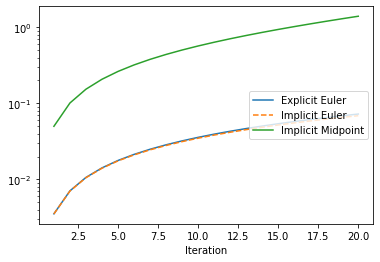

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def ExplEulStep(A, Y0, h):
    # explicit Euler step
    # Input:
    #	A - matrix
    #	Y0 - initial value
    #	h - step size
    
    Y = Y0+h*np.matmul(A,Y0)
    
    return Y

def ImplEulStep(A, Y0, h):
    # implicit Euler step
    # Input:
    #	A - matrix
    #	Y0 - initial value
    #	h - step size
    
    Y = np.linalg.solve(np.identity(2)-h*A,Y0)
    
    return Y

def ImplMidpStep(A, Y0, h):
    # step of implicit midpoint rule
    # Input:
    #	A - matrix
    #	Y0 - initial value
    #	h - step size
    
    Y = np.linalg.solve(np.identity(2)-h/2*A,Y0+h/2*A*Y0)
    
    return Y

# set the matrix A, the intital condition Y(0) and step size h
A = np.array([[0,1],[-1,0]],dtype='double')
print(A)
Y0 = 1/np.sqrt(2)*np.array([[1,1],[-1,1]],dtype='double')
print(Y0)
h = 1/20

# starting values for the iteration
Yexpleul = Y0
Yimpleul = Y0
Yimplmidp = Y0

# allocate memory for results (||Y_k'Y_k-I||_F)
normexpleul = np.zeros([20, 1]);
normimpleul = np.zeros([20, 1]);
normimplmidp = np.zeros([20, 1]);

for k in range(0,20):
    
    # compute the steps using the explicit, implicit Euler and implicit
    # midpoint rule
    Yexpleul = ExplEulStep(A, Yexpleul, h)
    Yimpleul = ImplEulStep(A, Yimpleul, h)
    Yimplmidp = ImplMidpStep(A, Yimplmidp, h)
	
    # compute the norms
    print(np.matmul(np.transpose(Y0),Y0))
    normexpleul[k] = np.linalg.norm(np.matmul(Yexpleul.T,Yexpleul)-np.identity(2),'fro')
    normimpleul[k] = np.linalg.norm(np.matmul(Yimpleul.T,Yimpleul)-np.identity(2),'fro')
    normimplmidp[k] = np.linalg.norm(np.matmul(Yimplmidp.T,Yimplmidp)-np.identity(2),'fro')
# plot the results
plt.semilogy(range(1,21),normexpleul,label="Explicit Euler")
plt.semilogy(range(1,21),normimpleul,'--',label="Implicit Euler")
plt.semilogy(range(1,21),normimplmidp,label="Implicit Midpoint")
plt.xlabel('Iteration')
plt.legend(loc="right")